In [1]:
import networkx as nx
from diffusion_models import Trivalency_Model_Higher_Prob
from influence_max_algorithms import MIA
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tqdm
import time as time
import pandas as pd

from nbc import non_backtracking_centrality

import pickle


In [2]:
pb2020 = nx.read_gml('/Users/davidguzman/Documents/GitHub/Network-Science-final-Maximization-/Proud_Boys_Datsets/PB2020.gml')

In [3]:
pb2020 = pb2020.reverse()

In [4]:
trivalency_model_2020_hp = Trivalency_Model_Higher_Prob()
trivalency_model_2020_hp.fit(pb2020)

In [5]:
def assing_model_probs_to_weights(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.probability[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

In [6]:
pb2020_trivalency_hp = assing_model_probs_to_weights(trivalency_model_2020_hp)

In [7]:
mia_trivalency_hp = MIA(pb2020_trivalency_hp)

In [12]:
seed_tr_hp = mia_trivalency_hp.MIA_fast(pb2020_trivalency_hp, 50, 0.3)

#remove duplicates
seed_tr_hp = list(dict.fromkeys(seed_tr_hp))

with open('seed_tr_hp.pickle', 'wb') as handle:
    pickle.dump(seed_tr_hp, handle, protocol=pickle.HIGHEST_PROTOCOL)

Starting MIA intialization


100%|██████████| 13217/13217 [01:41<00:00, 129.91it/s]


Initialization Completed


100%|██████████| 50/50 [11:37<00:00, 13.95s/it]


In [13]:
#calcualate the number of nodes reached by the seed sets generated by MIA using seed sets of size 5, 10, 20
activate_nums_dict_tr_hp = {}
for i in range(1, 50, 1):
    seed_kcore_wcm_temp = seed_tr_hp[:i]
    activate_nums = trivalency_model_2020_hp.monte_carlo_diffusion_all(seed_tr_hp[:i], num_simulations=50)
    activate_nums_dict_tr_hp[i] = sum(activate_nums)

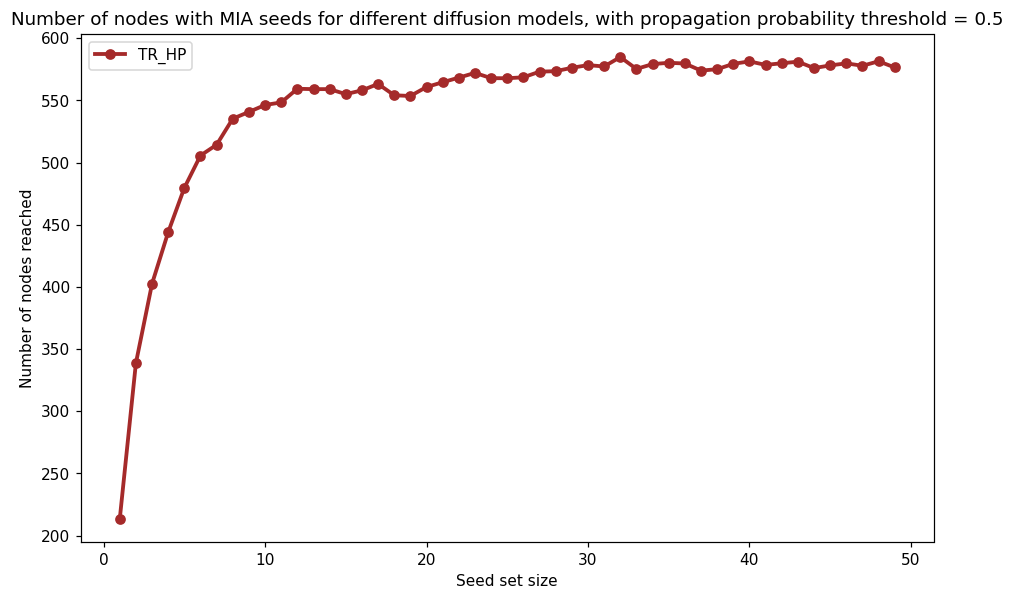

In [14]:
#plot the number of nodes reached by the seed sets generated by MIA using seed sets of size 5, 10, 20
plt.figure(figsize=(10,6), dpi=110)
plt.plot(activate_nums_dict_tr_hp.keys(), activate_nums_dict_tr_hp.values(), color = "brown", linewidth=2.5, linestyle="-", label="TR_HP", marker="o")
plt.title("Number of nodes with MIA seeds for different diffusion models, with propagation probability threshold = 0.5")
plt.ylabel("Number of nodes reached")
plt.xlabel("Seed set size")
plt.legend()
plt.show()